In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn import datasets
from tqdm.auto import tqdm
import scipy.stats as sc

from core.wca import wca_mean
k=2

### Random sampling

In [2]:
# Random 
iris = datasets.load_iris()
y = iris.target
columns=iris.feature_names
X = iris.data
df=pd.DataFrame(X,columns=columns)
df['target'] = y
X = df.drop('target',axis=1)
df.head(2)

C_random = dict()
for cluster in range(k):
    C_random[cluster] = pd.DataFrame(X[:1])

# Initializing the pv-alues
pval_random = dict()
for cluster in range(k):
    pval_random[cluster] = dict()
    for i in C_random[0].columns:
        pval_random[cluster][i] = list()

for i in tqdm(range(int(len(X)/k)), desc = "Iterations: "):
    for cluster in range(k):
        idx = np.random.randint(low=0,high=len(X))
        C_random[cluster] = C_random[cluster].append(X.iloc[idx])
        X.drop(idx, inplace=True)
        X.reset_index(drop=True,inplace=True)
        C_random[cluster].reset_index(drop=True,inplace=True)
        for i in C_random[0].columns:
            pval_random[cluster][i].append(sc.ks_2samp(C_random[cluster][i],df.drop('target',axis=1)[i])[1])

### WCA

In [3]:
# Getting the data
iris = datasets.load_iris()
y = iris.target
columns=iris.feature_names
X = iris.data
df=pd.DataFrame(X,columns=columns)
df['target'] = y
X = df.drop('target',axis=1)

# Running the wca_mean function
C, pval = wca_mean(X, k, df)

### Plotting the result

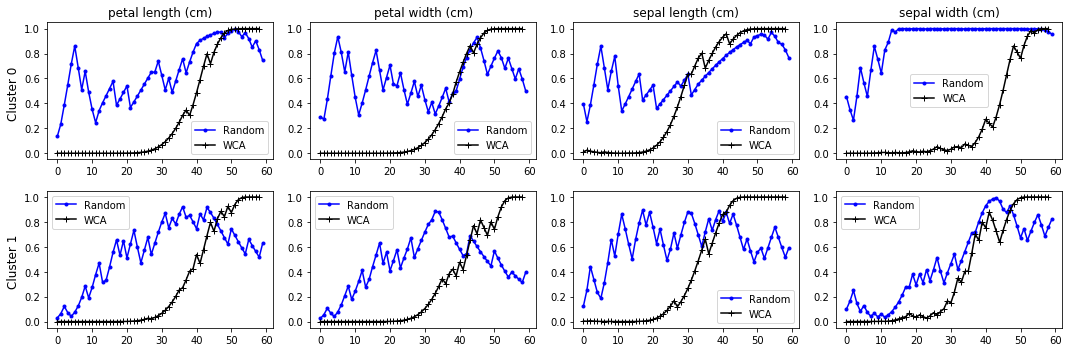

In [4]:
fig, axes = plt.subplots(k, len(C[0].columns), figsize=(15,5))

# Plotting the KS p-value
for cluster in range(k):
    for i,j in enumerate(C[0].columns):
        axes[cluster, i].plot(pval_random[cluster][j][15:], marker='.',color="Blue")
        axes[cluster, i].plot(pval[cluster][j][15:], marker='+',color='Black')
        axes[cluster, i].legend(['Random','WCA'])
        

# Setting columns headers
for ax, col in zip(axes[0], C[0].columns):
    ax.set_title(col)

# Setting row titles
for ax, row in zip(axes[:,0], range(k)):
    ax.set_ylabel("Cluster {} ".format(row), rotation=90, size='large')
        
plt.tight_layout()
plt.show()      